In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import pdb
import matplotlib.pyplot as plt
import cartopy
from utils import u_plot as up, u_darrays
import cartopy.crs as ccrs
import os
import matplotlib as mpl
import pickle as pkl
from utils import constants as cnst, u_darrays, u_grid, u_plot
from scipy.ndimage.measurements import label
import ipdb

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [6]:
ts = xr.open_dataset('/media/ck/Elements/Africa/ARC2_daily/pr_mean_day_gridded_CPC_ARC2_native_19830101-20190428.nc')#"/global/chirps-v2.0.monthly.nc")
WA = [-10,10,4,8.5]
SA = [5,55,-40,0]

In [7]:
ts

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 801, lon: 751, time: 13267)
Coordinates:
  * lat        (lat) float64 -40.0 -39.9 -39.8 -39.7 ... 39.7 39.8 39.9 40.0
  * lon        (lon) float64 -20.0 -19.9 -19.8 -19.7 ... 54.7 54.8 54.9 55.0
  * time       (time) datetime64[ns] 1983-01-01T12:00:00 ... 2019-04-28T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pr         (time, lat, lon) float32 ...

In [13]:
monthly = ts['pr'].sel(time=(ts['time.year']==2005)).resample(time='1M').mean()

In [48]:
np.percentile(monthly[7,:,:],90)

4.9016467528417706e-05

In [19]:
cross = monthly.mean('lon').sel(lat=slice(4,20))

In [36]:
cross = cross*100000

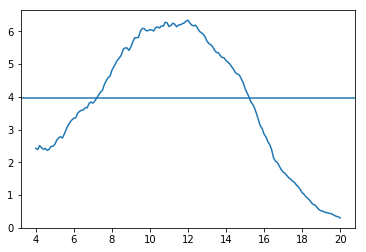

In [45]:
plt.plot(cross.lat,cross[7])
plt.axhline(3.96)

In [46]:
np.sum(cross[7]>3.96)

<xarray.DataArray 'pr' ()>
array(81)
Coordinates:
    time     datetime64[ns] 2005-08-31

In [49]:
cross[6].mean()

<xarray.DataArray 'pr' ()>
array(3.32811671)
Coordinates:
    time     datetime64[ns] 2005-07-31

In [65]:
np.sum(cross[6]>cross[6].mean())

<xarray.DataArray 'pr' ()>
array(93)
Coordinates:
    time     datetime64[ns] 2005-07-31

In [66]:
np.sum(cross[9]>cross[9].mean())

<xarray.DataArray 'pr' ()>
array(72)
Coordinates:
    time     datetime64[ns] 2005-10-31

In [60]:
np.sum(cross[7]>cross[7].mean())

<xarray.DataArray 'pr' ()>
array(84)
Coordinates:
    time     datetime64[ns] 2005-08-31

In [62]:
cross[7].max()/cross[7].mean()

<xarray.DataArray 'pr' ()>
array(1.65631004)
Coordinates:
    time     datetime64[ns] 2005-08-31

In [63]:
cross[6].max()/cross[6].mean()

<xarray.DataArray 'pr' ()>
array(1.74037055)
Coordinates:
    time     datetime64[ns] 2005-07-31

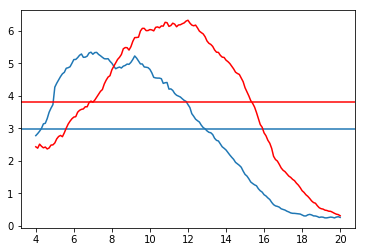

In [68]:
plt.plot(cross.lat,cross[5])
plt.axhline(cross[5].mean())
plt.axhline(cross[7].mean(),color='r')
plt.plot(cross.lat,cross[7],color='r')

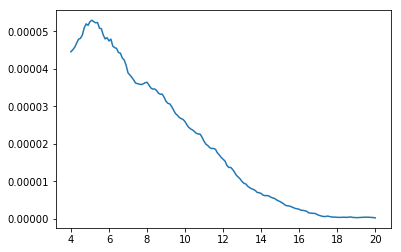

In [31]:
plt.plot(cross.lat,cross[9])

In [118]:
mean_years = ts.sel(longitude=slice(WA[0], WA[1]), latitude=slice(WA[2], WA[3]))

#mean_years = u_darrays.flip_lat(mean_years)
month = (mean_years['rainfall'])[(mean_years['time.month']==3)]# & (mean_years['time.month']<=5)]

In [119]:
ts = month.groupby('time.year').mean('time').mean(['latitude', 'longitude'])

In [121]:
month

<xarray.DataArray 'rainfall' (time: 1085, latitude: 46, longitude: 221)>
dask.array<shape=(1085, 46, 221), dtype=float32, chunksize=(31, 46, 221)>
Coordinates:
  * longitude  (longitude) float32 -12.0 -11.9 -11.8 -11.7 ... 9.7 9.8 9.9 10.0
  * latitude   (latitude) float32 4.0 4.1 4.2 4.3 4.4 ... 8.1 8.2 8.3 8.4 8.5
  * time       (time) datetime64[ns] 1981-03-01 1981-03-02 ... 2015-03-31
Attributes:
    standard_name:  precipitation_amount
    long_name:      Precipitation amount
    units:          mm

/home/ck/miniconda3/lib/python3.5/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ck/miniconda3/lib/python3.5/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


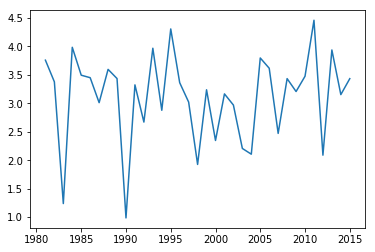

In [122]:
plt.plot(ts.year, ts)

In [105]:
mean_years = u_darrays.to_newarray(mean_years)

In [92]:
mean_years = mean_years.groupby('time.year').mean('time') #mean rain trend
# mean_years = mean_years.where((mean_years >= 12), other=0)
# mean_years.values[mean_years.values>=12] = 1

/home/ck/miniconda3/lib/python3.5/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [93]:
mean_y = u_grid.refactor_da(mean_years, 0.25, method=np.mean)

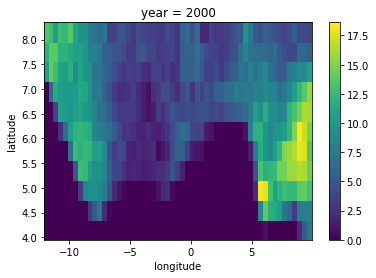

In [94]:
grouped_y[19,:,:].plot.pcolormesh()

In [96]:
grouped_y

<xarray.DataArray (year: 35, latitude: 11, longitude: 55)>
array([[[ 0.    ,  0.    , ...,  4.625 ,  8.3125],
        [ 0.    ,  0.    , ...,  5.9375,  6.6875],
        ...,
        [11.8125, 12.3125, ...,  2.375 ,  2.125 ],
        [14.5625, 13.6875, ...,  0.5625,  0.9375]],

       [[ 0.    ,  0.    , ...,  6.25  ,  9.6875],
        [ 0.    ,  0.    , ...,  9.8125,  8.4375],
        ...,
        [ 8.25  ,  9.125 , ...,  2.875 ,  2.625 ],
        [11.1875, 11.8125, ...,  0.8125,  0.5   ]],

       ...,

       [[ 0.    ,  0.    , ...,  5.5625,  8.9375],
        [ 0.    ,  0.    , ...,  8.8125,  8.5   ],
        ...,
        [ 9.375 ,  9.625 , ...,  6.5   ,  5.8125],
        [12.25  , 10.4375, ...,  3.375 ,  1.9375]],

       [[ 0.    ,  0.    , ...,  8.75  ,  9.125 ],
        [ 0.    ,  0.    , ..., 13.0625, 12.125 ],
        ...,
        [ 8.5   ,  7.875 , ...,  3.9375,  3.5   ],
        [10.6875,  8.5625, ...,  1.125 ,  1.125 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude

In [97]:
def calc_trend(mean_years, method='mk', sig=False):
    # stack lat and lon into a single dimension called allpoints
    datastacked = mean_years.stack(allpoints=['latitude', 'longitude'])

    # apply the function over allpoints to calculate the trend at each point
    print('Entering trend calc')

    alpha = 0.05
    # NaNs means there is not enough data, slope = 0 means there is no significant trend.
    if method=='mk':
        dtrend = datastacked.groupby('allpoints').apply(u_darrays.linear_trend_mk, alpha=alpha, eps=0.0001,nb_missing=10)
        dtrend = dtrend.unstack('allpoints')
        if sig:
            (dtrend['slope'].values)[dtrend['ind'].values==0] = 0
            
    return dtrend

In [98]:
trend=calc_trend(grouped_y)

Entering trend calc


/home/ck/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ck/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [99]:
trend['slope'].values = trend['slope'].values*10

In [100]:
mean = grouped_y.mean('year')

In [101]:
ts = grouped_y.mean(['latitude', 'longitude'])

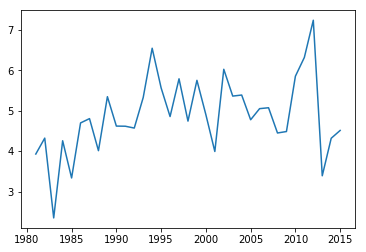

In [102]:
plt.plot(ts.year, ts)

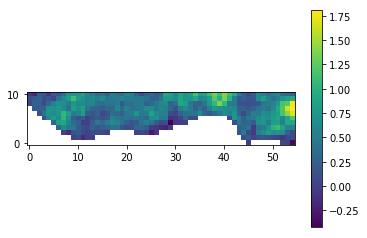

In [61]:
plt.figure()
plt.imshow(trend['slope'], origin='lower')
plt.colorbar()

In [67]:
#trend['slope'].values[trend['pval'].values>0.05] = 0

In [68]:
mean

<xarray.DataArray (latitude: 11, longitude: 55)>
array([[ 0.      ,  0.      ,  0.      , ...,  2.4125  ,  7.483929,  9.616072],
       [ 0.      ,  0.      ,  0.      , ...,  7.825   , 10.076786, 10.275   ],
       [ 0.      ,  0.      ,  0.      , ..., 12.910714, 12.880357, 11.526786],
       ...,
       [ 9.      , 11.196428, 10.966071, ...,  8.148214,  8.383928, 10.375   ],
       [10.555357, 11.105357, 11.103572, ...,  5.283928,  5.455357,  5.571429],
       [11.710714, 11.833928, 11.025   , ...,  3.683928,  2.685714,  2.35    ]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float64 4.15 4.55 4.95 5.35 ... 6.95 7.35 7.75 8.15
  * longitude  (longitude) float64 -11.85 -11.45 -11.05 ... 8.95 9.35 9.75

In [63]:
## a clean way of plotting - use matplotlib functions directly:

def draw_map(data, lon, lat, title=None,  mask_sig=None, quiver=None, contour=None, contour2=None, cbar_label=None, **kwargs):
    f=plt.figure(figsize=(10,8), dpi=300)  # this opens a plot window
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())  # this opens a new plot axis
    mapp = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),**kwargs)  # this is the actual plot
    
    ## mask for significance indicator
    if mask_sig is not None:
         plt.pcolormesh(lon, lat, mask_sig, colors='none', hatches='.',
                     levels=[0.5, 1], linewidth=0.1)
    
    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'], scale=quiver['scale'])
    ## additional contour on plot   
    if contour is not None:
        con = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='k', linewidths=0.5 )
        plt.clabel(con, inline=True, fontsize=7, fmt='%1.1f')
        
    if contour2 is not None:
        con = ax.contour(contour2['x'], contour2['y'], contour2['data'], levels=contour2['levels'], colors='r', linewidths=0.5 )
        plt.clabel(con, inline=True, fontsize=7, fmt='%1.1f')
    
    ax.coastlines()   ## adds coastlines
    # Gridlines
    xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
    xl.xlabels_top = False   ## labels off
    xl.ylabels_right = False
    plt.title(title)
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
    cbar = plt.colorbar(mapp)  # adds colorbar
    cbar.set_label(cbar_label) 
    f.canvas.draw()
    plt.tight_layout()
    #plt.savefig(cnst.network_data + 'figs/CLOVER/SA/CHIRPS_trend.pdf')

In [64]:
map = grouped_y.salem.get_map()
#contour = {'x' : mean_y['longitude'].values, 'y': mean_y['latitude'].values, 'data': clim, 'levels': np.linspace(50, 300, 5)}
#contour2 = {'x' : mean_y['longitude'].values, 'y': mean_y['latitude'].values, 'data': clim, 'levels': np.linspace(25, 75, 2)}
# draw_map(trend['slope'], mean_y['longitude'].values, mean_y['latitude'].values, cmap='RdBu', extend='both', levels = [-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1] ,
#         cbar_label='mm month$^{-1}$ decade$^{-1}$', title='CHIRPS rainfall trend 1981-2019, NDJ')  #[-10,-8,-6,-4,-2,2,4,6,8,10]

In [65]:
np.nanmax((trend['slope'].values/mean.values)*100)

30.094172612702568

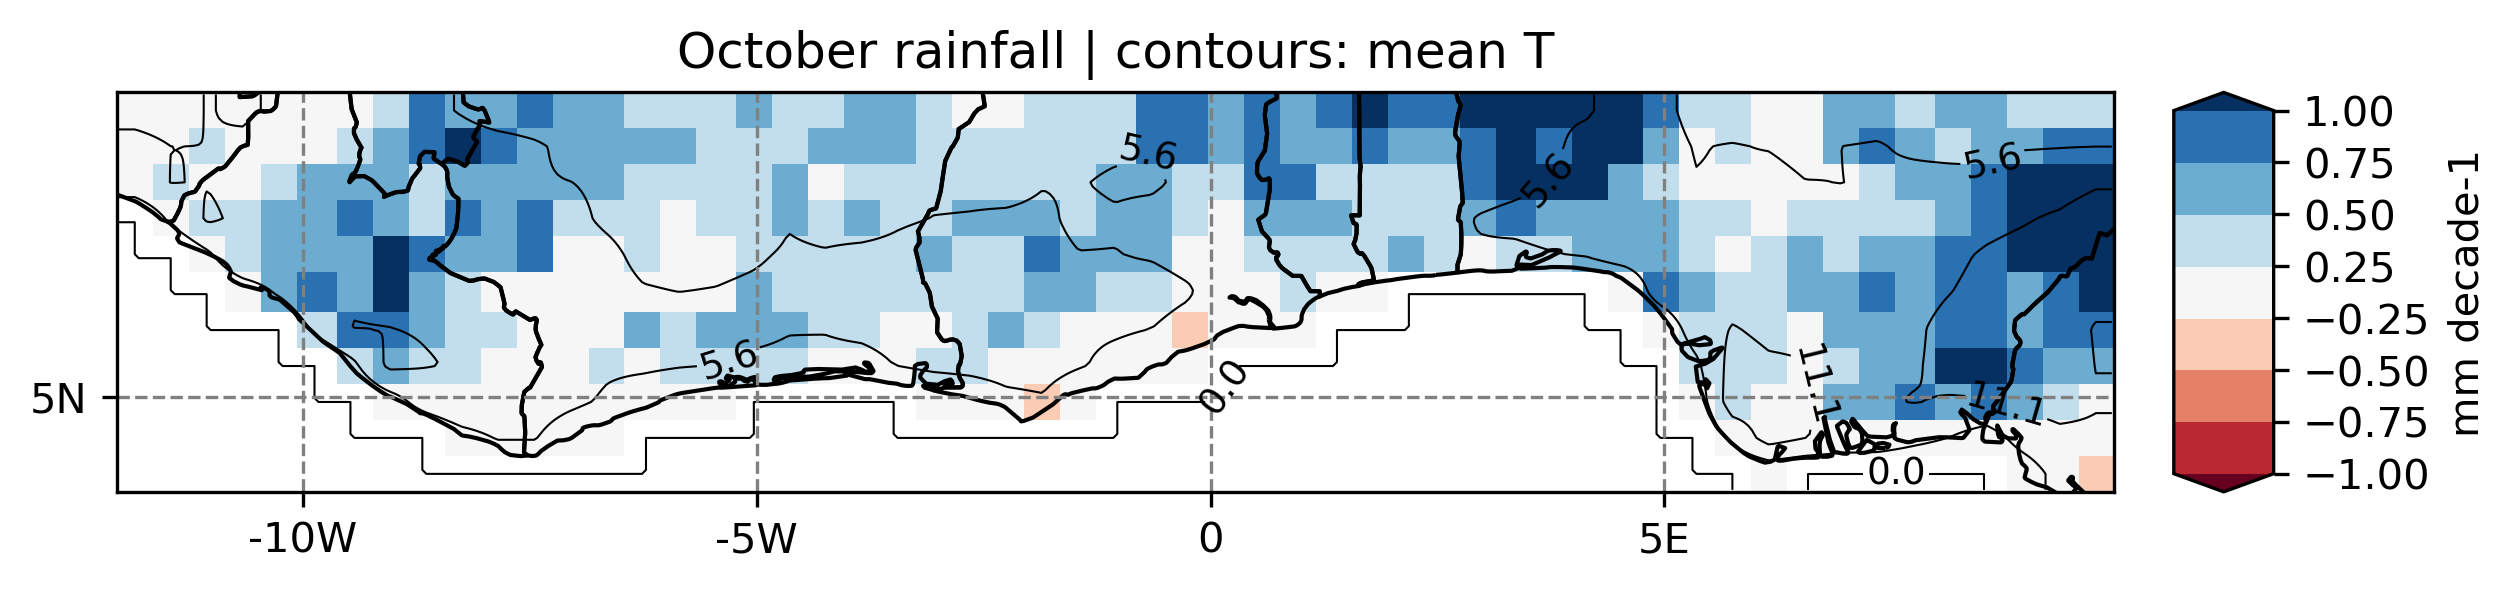

In [69]:
f = plt.figure(figsize=(10,2), dpi=300)


ax1 = f.add_subplot(111)
map.set_data(trend['slope'])  # interp='linear'
map.set_plot_params(levels=np.array([-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1]), cmap='RdBu', extend='both')  # levels=np.arange(-0.5,0.51,0.1),

map.set_contour((mean.values).astype(np.float64), interp='linear', colors='k', linewidths=0.5, levels=np.linspace(0,50,10))
#map.set_plot_params(levels=[-0.5,-0.4,-0.3,-0.2,-0.1,-0.05,-0.02, 0.02,0.05,0.1,0.2,0.3,0.4,0.5], cmap='RdBu_r', extend='both')  # levels=np.arange(-0.5,0.51,0.1),

dic = map.visualize(ax=ax1, title='October rainfall | contours: mean T', cbar_title='mm decade-1')
contours = dic['contour'][0]
plt.clabel(contours, inline=True, fontsize=9, fmt='%1.1f')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/CLOVER/CHIRPS/OCT_PCP_trend.png')